In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../data')

In [78]:
# Plot the expected value of magnetization using a 10x10 square lattice, using metropolis algorithm


# load the data files
Zexp_metropolis= np.loadtxt('data/2DIsingMC_metropolis_Nsites_100_Nsteps_10000000_lag_1000_n_eq_1000000.dat')
beta_arr=np.linspace(0.01,0.99,20)

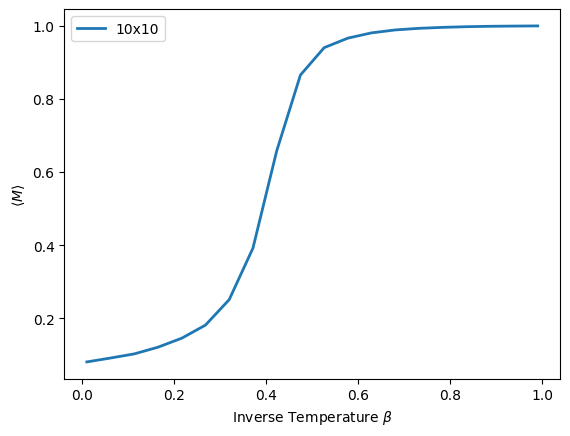

In [79]:
plt.plot(beta_arr,Zexp_metropolis,lw=2,label=r'10x10')
plt.xlabel(r'Inverse Temperature $\beta$')
plt.ylabel(r'$\langle M \rangle $')
plt.legend()
plt.show()

How many steps does it take to reach equilibrium?

In [97]:
# temp = 0.8 and 0.5
# load the data file
Zfull_metropolis_t1= np.abs(np.loadtxt('data/2DIsingMC_metropolis_Nsites_100_temp_0.8_full.dat')) # only absolute values important here
Zfull_metropolis_t2= np.abs(np.loadtxt('data/2DIsingMC_metropolis_Nsites_100_temp_0.5_full.dat')) # only absolute values important here


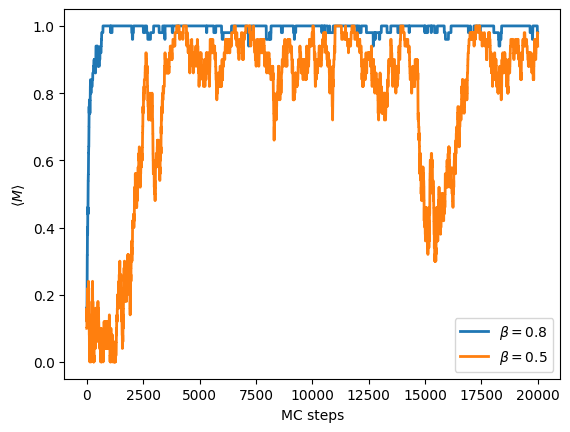

In [100]:
#plot the absolute value with number of steps

plt.plot(Zfull_metropolis_t1[:20000],lw=2,label=r'$\beta=0.8$')
plt.plot(Zfull_metropolis_t2[:20000],lw=2,label=r'$\beta=0.5$')

plt.xlabel('MC steps')
plt.ylabel(r'$\langle M \rangle $')
plt.legend()
plt.show()

It takes around 1000 steps to equilibriate in the ferromagnetic phase (beta = 0.8), which is well below what we set in the first plot to calculate equilibrium expectation values. For beta=0.5, it takes around 5000 steps, and the fluctuations are larger, because it is near the critical point. Let's see what the autocorrelation looks like after equilibriation, so we can be sure that the lag is also consistent.


In [103]:
# pandas series
Z_eq_t1=pd.Series(Zfull_metropolis_t1[10**3:10**5])
Z_eq_t2=pd.Series(Zfull_metropolis_t2[10**4:10**5])


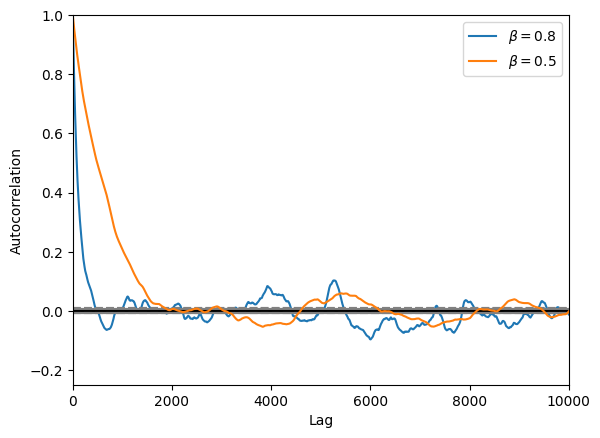

In [108]:
pd.plotting.autocorrelation_plot(Z_eq_t1,label=r'$\beta=0.8$')
pd.plotting.autocorrelation_plot(Z_eq_t2,label=r'$\beta=0.5$')

plt.xlim(0,10**4)
plt.ylim(-0.25,1.0)
plt.legend()
plt.show()

Thus, the autocorrelation decays more slowly near the critical point.